<a href="https://colab.research.google.com/github/msskx/deepLearning/blob/main/%E5%8D%B7%E7%A7%AF%E7%BD%91%E7%BB%9C%E6%89%8B%E5%86%99%E6%95%B0%E5%AD%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import torchvision
from torch.utils.data import Dataset,DataLoader
from torchvision import datasets
from torchvision import transforms as T

In [3]:

transformation=T.Compose([
    T.ToTensor(),
])

In [4]:
train_ds=datasets.FashionMNIST(
    './data/',
    train=True,
    transform=transformation,
    download=True
)

In [5]:
test_ds=datasets.FashionMNIST(
    './data/',
    train=False,
    transform=transformation,
    download=True
)
   

In [6]:
train_dl=DataLoader(train_ds,batch_size=64,shuffle=True)
test_dl=DataLoader(test_ds,batch_size=256)

In [7]:
def imshow(img):
  npimg=img.numpy()
  npimg=np.squeeze(npimg)
  plt.imshow(npimg)

In [8]:
imshow(imgs[0])

NameError: ignored

In [ ]:
plt.figure(figsize=(10,1))
for i,img in enumerate(imgs[:10]):
  plt.subplot(1,10,i+1)
  imshow(img)
  plt.title(labels[i])

In [13]:
import time

def train(model, optimizer, loss_fn, train_dl, val_dl, epochs=20, device='cuda'):
   
    print('train() called: model=%s, opt=%s(lr=%f), epochs=%d, device=%s\n' % \
          (type(model).__name__, type(optimizer).__name__,
           optimizer.param_groups[0]['lr'], epochs, device))

    history = {} # Collects per-epoch loss and acc like Keras' fit().
    history['loss'] = []
    history['val_loss'] = []
    history['acc'] = []
    history['val_acc'] = []

    start_time_sec = time.time()
    model.to(device)
    for epoch in range(epochs):

        # --- TRAIN AND EVALUATE ON TRAINING SET -----------------------------
        model.train()
        train_loss         = 0.0
        num_train_correct  = 0
        num_train_examples = 0

        for batch in train_dl:

            optimizer.zero_grad()

            x    = batch[0].to(device)
            y    = batch[1].to(device)
            yhat = model(x)
            loss = loss_fn(yhat, y)

            loss.backward()
            optimizer.step()

            train_loss         += loss.data.item() * x.size(0)
            num_train_correct  += (torch.max(yhat, 1)[1] == y).sum().item()
            num_train_examples += x.shape[0]

        train_acc   = num_train_correct / num_train_examples
        train_loss  = train_loss / len(train_dl.dataset)


        # --- EVALUATE ON VALIDATION SET -------------------------------------
        model.eval()
        val_loss       = 0.0
        num_val_correct  = 0
        num_val_examples = 0

        for batch in val_dl:

            x    = batch[0].to(device)
            y    = batch[1].to(device)
            yhat = model(x)
            loss = loss_fn(yhat, y)

            val_loss         += loss.data.item() * x.size(0)
            num_val_correct  += (torch.max(yhat, 1)[1] == y).sum().item()
            num_val_examples += y.shape[0]

        val_acc  = num_val_correct / num_val_examples
        val_loss = val_loss / len(val_dl.dataset)


        print('Epoch %3d/%3d, train loss: %5.2f, train acc: %5.2f, val loss: %5.2f, val acc: %5.2f' % \
              (epoch+1, epochs, train_loss, train_acc, val_loss, val_acc))

        history['loss'].append(train_loss)
        history['val_loss'].append(val_loss)
        history['acc'].append(train_acc)
        history['val_acc'].append(val_acc)

    # END OF TRAINING LOOP
    end_time_sec       = time.time()
    total_time_sec     = end_time_sec - start_time_sec
    time_per_epoch_sec = total_time_sec / epochs
    print()
    print('Time total:     %5.2f sec' % (total_time_sec))
    print('Time per epoch: %5.2f sec' % (time_per_epoch_sec))

    plt.figure(dpi=400)
    plt.plot(range(1,epochs+1),history['loss'],label='train_loss')
    plt.plot(range(1,epochs+1),history['val_loss'],label='test_loss')
    plt.title("Loss")
    plt.legend()
    plt.show()

    plt.figure(dpi=400)
    plt.plot(range(1,epochs+1),history['acc'],label='train_acc')
    plt.plot(range(1,epochs+1),history['val_acc'],label='test_acc')
    plt.title("Accuracy")
    plt.legend()
    plt.show()
    return history
     
     

In [14]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,6,3)
    self.pool  = nn.MaxPool2d((2,2))
    self.conv2 = nn.Conv2d(6,16,5)
    self.liner_1 = nn.Linear(16*4*4,256)
    self.liner_2 = nn.Linear(256,10)
  def forward(self,input):
    x=F.relu(self.conv1(input))
    x=self.pool(x)
    x=F.relu(self.conv2(x))
    x=self.pool(x)
    x=nn.Flatten()(x)
    x=F.relu(self.liner_1(x))
    x=self.liner_2(x)
    return x

In [15]:

model=Model()
opt=optim.Adam(model.parameters(),lr=0.001)
loss_fn=nn.CrossEntropyLoss()


train() called: model=Model, opt=Adam(lr=0.001000), epochs=20, device=cuda

Epoch   1/ 20, train loss:  0.66, train acc:  0.75, val loss:  0.50, val acc:  0.81
Epoch   2/ 20, train loss:  0.42, train acc:  0.84, val loss:  0.41, val acc:  0.85
Epoch   3/ 20, train loss:  0.36, train acc:  0.87, val loss:  0.37, val acc:  0.87
Epoch   4/ 20, train loss:  0.33, train acc:  0.88, val loss:  0.35, val acc:  0.88
Epoch   5/ 20, train loss:  0.31, train acc:  0.89, val loss:  0.38, val acc:  0.86
Epoch   6/ 20, train loss:  0.29, train acc:  0.89, val loss:  0.32, val acc:  0.89
Epoch   7/ 20, train loss:  0.28, train acc:  0.90, val loss:  0.31, val acc:  0.89
Epoch   8/ 20, train loss:  0.26, train acc:  0.90, val loss:  0.31, val acc:  0.89
Epoch   9/ 20, train loss:  0.26, train acc:  0.91, val loss:  0.29, val acc:  0.89
Epoch  10/ 20, train loss:  0.25, train acc:  0.91, val loss:  0.33, val acc:  0.88
Epoch  11/ 20, train loss:  0.24, train acc:  0.91, val loss:  0.29, val acc:  0.89


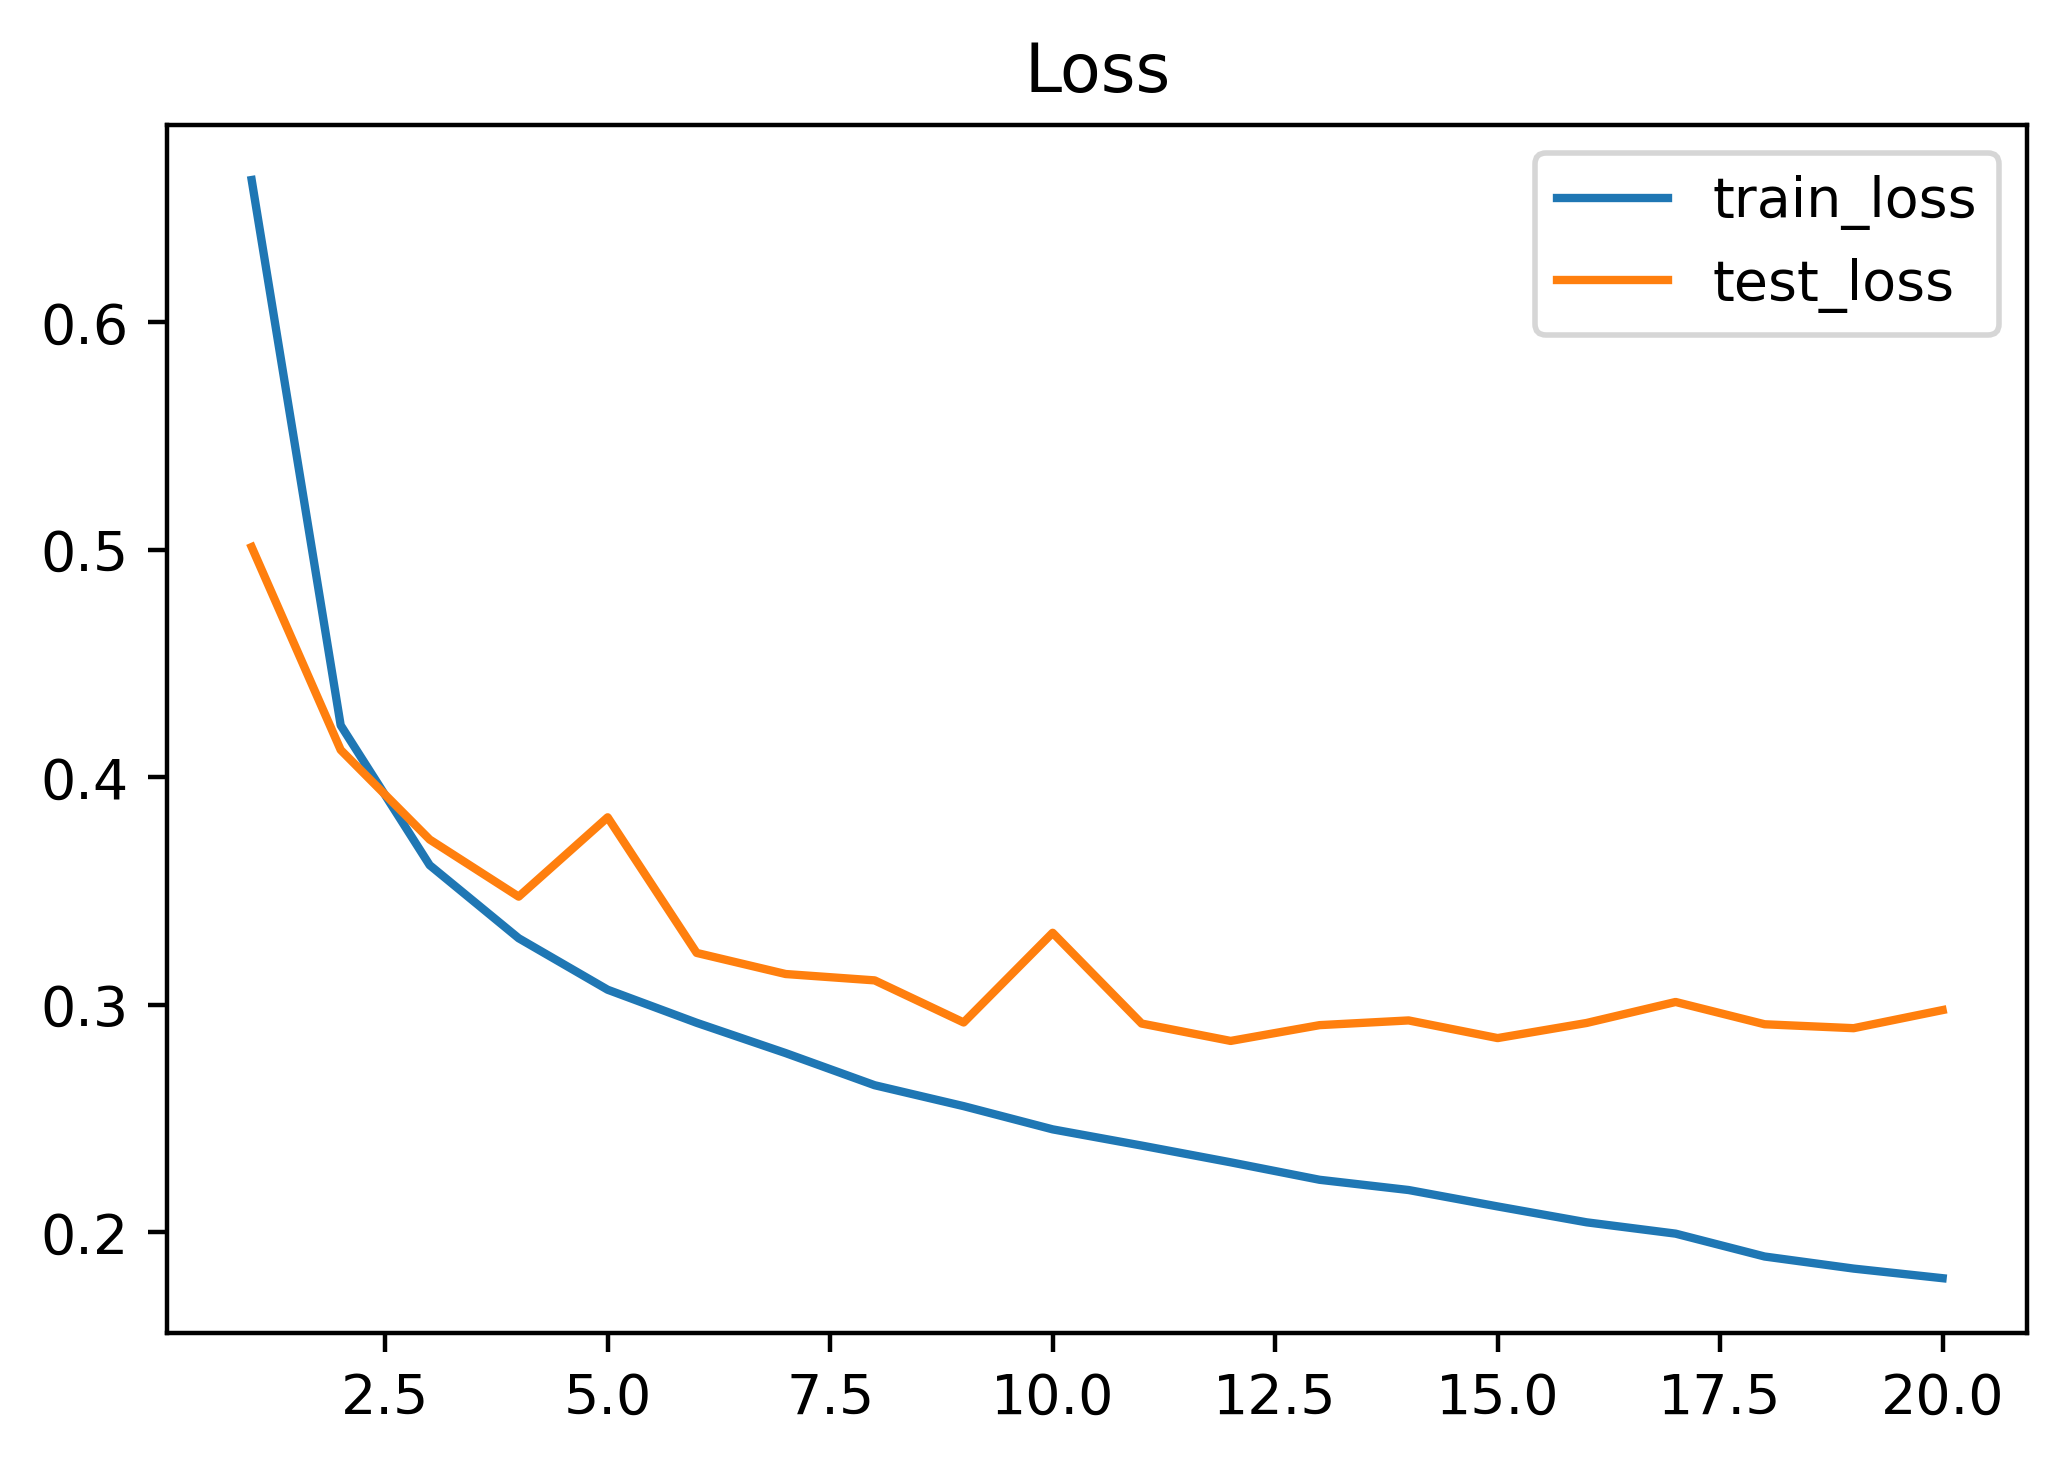

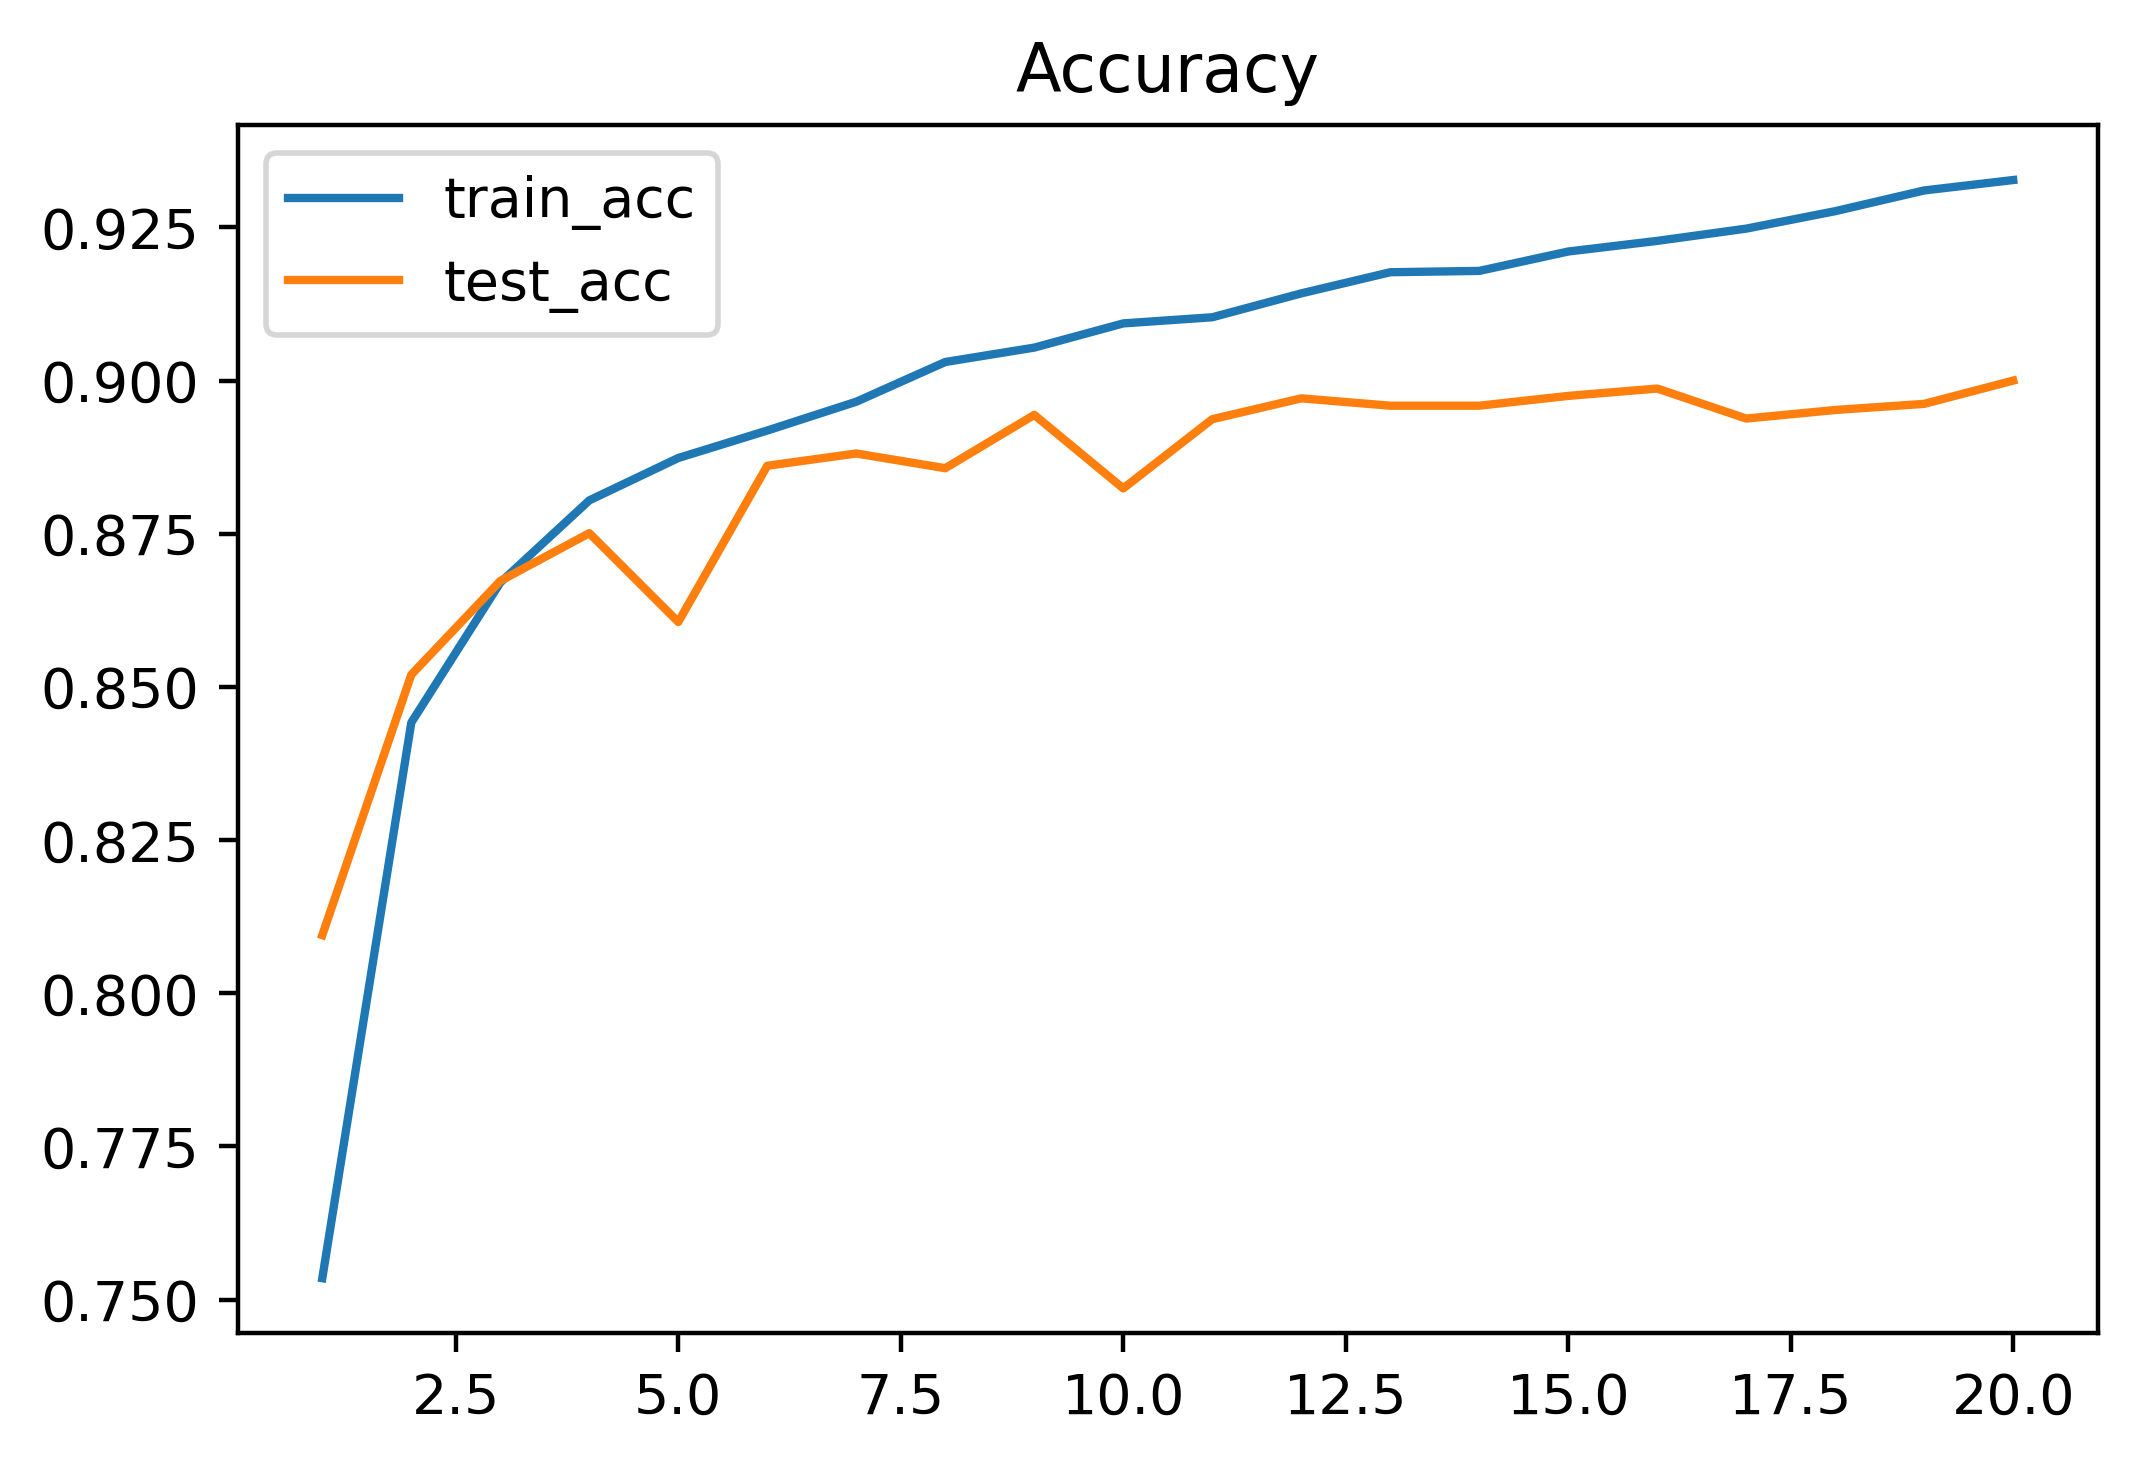

In [16]:
history=train(model, opt, loss_fn, train_dl, test_dl, epochs=20)

In [18]:
torch.cuda.is_available()

True